In [9]:
video_output = {
    "SPEAKER_00": [(3.92, 5.64), (6.4, 6.56), (7.32, 12.68), (180.72, 183.44)],
    "SPEAKER_01": [
        (32.76, 45.48),
        (45.84, 81.76),
        (81.92, 82.24),
        (82.68, 87.64),
        (208.0, 238.12),
        (238.76, 243.04),
        (243.36, 249.96),
    ],
    "SPEAKER_02": [(87.72, 89.24), (90.24, 91.48), (91.6, 105.52), (107.24, 115.24), (157.0, 175.84), (177.56, 179.8)],
}

audio_output = {
    "SPEAKER_01": [
        (3.947368421052632, 7.037351443123939),
        (7.207130730050935, 32.26655348047538),
        (117.00339558573853, 119.27843803056027),
        (120.02546689303907, 131.2988115449915),
        (131.33276740237693, 133.93039049235995),
        (134.64346349745333, 151.7741935483871),
        (151.7911714770798, 151.9949066213922),
        (152.43633276740238, 152.5042444821732),
        (180.24617996604417, 190.31409168081495),
        (191.16298811544993, 196.79966044142617),
    ],
    "SPEAKER_02": [
        (32.26655348047538, 45.492359932088284),
        (45.86587436332768, 88.00509337860782),
        (196.95246179966045, 238.2937181663837),
        (238.7691001697793, 250.14431239388796),
    ],
    "SPEAKER_00": [
        (88.00509337860782, 89.31239388794566),
        (90.28013582342953, 94.45670628183362),
        (94.7792869269949, 117.00339558573853),
        (151.02716468590833, 151.7911714770798),
        (151.9949066213922, 152.43633276740238),
        (152.5042444821732, 152.6400679117148),
        (153.16638370118847, 180.24617996604417),
        (243.42105263157896, 243.96434634974534),
    ],
}

In [10]:
from pyannote.core import Segment, Annotation
from pyannote.core import notebook
import matplotlib.pyplot as plt


def create_annotation_plot(speaker_timelines):
    custom_diarization = Annotation()
    
    for speaker_key in speaker_timelines.keys():
        for timeline in speaker_timelines[speaker_key]:
            custom_diarization[Segment(timeline[0], timeline[1])] = speaker_key

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 2))

    # Plot the custom diarization result
    notebook.plot_annotation(custom_diarization, ax, legend=True)

    # Customize the plot (if needed)
    ax.set_xlabel('Time')
    ax.set_yticks([])  # To hide the y-axis

    # Save the figure
#     fig.savefig('custom_diarization_plot.png', bbox_inches='tight')

    # Show the figure (optional)
    plt.show()

In [11]:
def find_overlap(intervals1, intervals2):
    overlap = 0
    total_duration1 = 0
    total_duration2 = 0

    # Calculate the total duration of intervals in intervals1
    for start, end in intervals1:
        total_duration1 += end - start

    # Calculate the total duration of intervals in intervals2 and find the overlap
    for start, end in intervals2:
        total_duration2 += end - start
        for s1, e1 in intervals1:
            common_start = max(s1, start)
            common_end = min(e1, end)
            if common_start < common_end:
                overlap += common_end - common_start

    # Calculate the percentage of overlap with respect to intervals1
    percentage_overlap1 = (overlap / total_duration1) * 100

    # Calculate the percentage of overlap with respect to intervals2
    percentage_overlap2 = (overlap / total_duration2) * 100

    return percentage_overlap1, percentage_overlap2

intervals2 = [(1.2, 2.6), (3.8, 5.9), (7.9, 11.2)]
intervals1 = [(2.8, 4.6), (6.0, 7.2)]

percentage_overlap1, percentage_overlap2 = find_overlap(intervals1, intervals2)

print(f"Percentage of intervals1 present in intervals2: {percentage_overlap1:.2f}%")
print(f"Percentage of intervals2 present in intervals1: {percentage_overlap2:.2f}%")

Percentage of intervals1 present in intervals2: 26.67%
Percentage of intervals2 present in intervals1: 11.76%


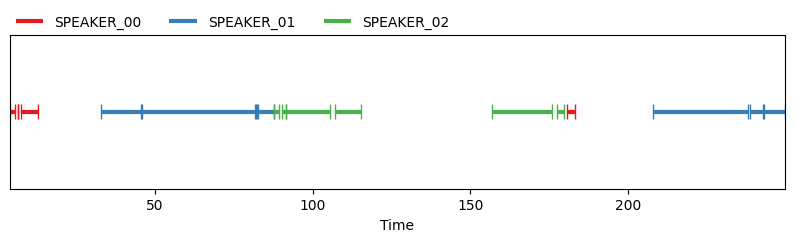

In [12]:
create_annotation_plot(video_output)

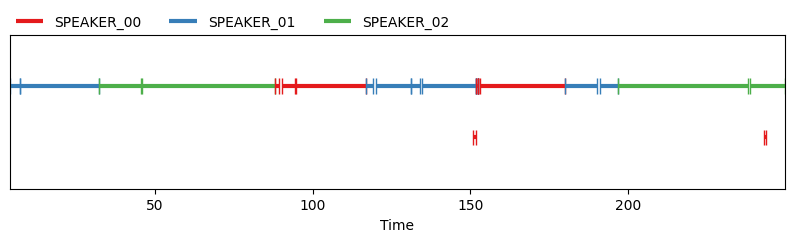

In [13]:
create_annotation_plot(audio_output)

In [14]:
print(find_overlap(video_output["SPEAKER_00"], audio_output["SPEAKER_00"]))
print(find_overlap(video_output["SPEAKER_01"], audio_output["SPEAKER_00"]))
print(find_overlap(video_output["SPEAKER_02"], audio_output["SPEAKER_00"]))

(0.0, 0.0)
(0.5723701202764242, 0.9586578789694393)
(98.58433162762535, 79.6017974835231)


In [16]:
print(find_overlap(video_output["SPEAKER_00"], audio_output["SPEAKER_01"]))
print(find_overlap(video_output["SPEAKER_01"], audio_output["SPEAKER_01"]))
print(find_overlap(video_output["SPEAKER_02"], audio_output["SPEAKER_01"]))

(99.72521665609807, 12.83246325948673)
(0.0, 0.0)
(0.0, 0.0)


In [15]:
print(find_overlap(video_output["SPEAKER_00"], audio_output["SPEAKER_02"]))
print(find_overlap(video_output["SPEAKER_01"], audio_output["SPEAKER_02"]))
print(find_overlap(video_output["SPEAKER_02"], audio_output["SPEAKER_02"]))

(0.0, 0.0)
(99.96315367350718, 87.79026076028899)
(0.623018746957661, 0.2637763116556855)


In [18]:
def get_video_to_audio_mapping(video_output, audio_output):    
    video_audio_mapping = {}
    for audio_speaker in audio_output.keys():
        for video_speaker in video_output.keys():
            video_overlap, _ = find_overlap(video_output[video_speaker], audio_output[audio_speaker])
            if video_overlap > 80:
                video_audio_mapping[audio_speaker] = video_speaker
                break
    return video_audio_mapping

In [2]:
class SpeakerInterval:
    def __init__(self, speaker_name, start_time, end_time):
        self.speaker_name = speaker_name
        self.start_time = start_time
        self.end_time = end_time
        
    def __lt__(self, other):
        return self.start_time < other.start_time

    def __str__(self):
        return f"{self.speaker_name}: {self.start_time:.2f}s to {self.end_time:.2f}s"
    
    def __repr__(self):
        return f"{self.speaker_name}: {self.start_time:.2f}s to {self.end_time:.2f}s"
    
class SpeakerDiarization:
    def __init__(self):
        self.speaker_intervals = []

    def add_interval(self, speaker_name, start_time, end_time):
        interval = SpeakerInterval(speaker_name, start_time, end_time)
        self.speaker_intervals.append(interval)
        self.speaker_intervals = sorted(self.speaker_intervals)
    
    def get_speaker_timeline(self, speaker_name):
        if len(self.speaker_intervals) == 0:
            return None
        
        speaker_timeline = []
        
        for speaker_interval in self.speaker_intervals:
            if speaker_interval.speaker_name == speaker_name:
                speaker_timeline.append(speaker_interval)
                
        return speaker_timeline
    
    def __str__(self):
        return str(self.speaker_intervals)
            
    def __repr__(self):
        return str(self.speaker_intervals)
    
def compare_speaker_timelines(timeline1, timeline2):
    
    overlap_time = 0
    total_time = 0
    
    for speaker_interval1 in timeline1:
        for speaker_interval2 in timeline2:
            if (speaker_interval1.start_time >= speaker_interval2.start_time) and (speaker_interval1.end_time <= speaker_interval2.end_time):
                overlap_time += speaker_interval1.end_time - speaker_interval1.start_time
                

In [4]:
spd = SpeakerDiarization()
spd.add_interval("Sp1", 2.2, 4)
spd.add_interval("Sp2", 1.8, 4)
spd.add_interval("Sp3", 2.6, 4)
spd.add_interval("Sp1", 3.8, 4)
spd.add_interval("Sp3", 3, 4)
spd.add_interval("Sp2", 2, 4)
spd.add_interval("Sp1", 0.6, 4)

In [ ]:
spd.get_speaker_timeline("Sp1")